### Import libs

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load data(cleaned)

In [ ]:
df = pd.read_csv('../dataset/HousePricingCleaned.csv')

### Model Training

In [ ]:
#Splt the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


#### Develop Linear Regression Model v1

Root Mean Squared Error: 0.06552893744593287
Mean Squared Error: 0.004294041642792983
R-squared (coefficient of determination): 0.8669800624109908


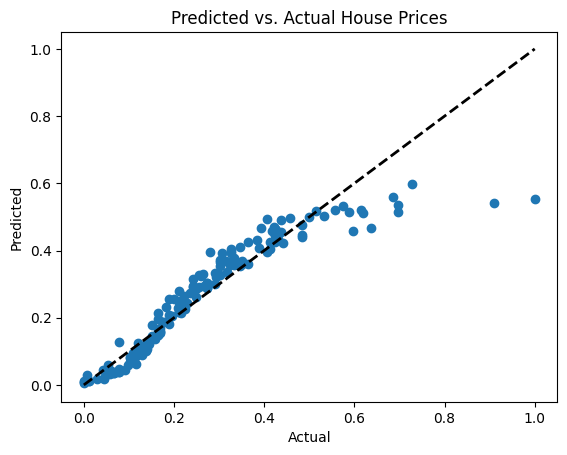

Accuracy of the model: 86.70%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training dataset
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the testing dataset
y_pred = lr_model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Root Mean Squared Error:",rmse)
print("Mean Squared Error:", mse)
print("R-squared (coefficient of determination):",r2)

# Plot predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-') #plot a line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()

# Print the accuracy of the model
print("Accuracy of the model: {:.2f}%".format(lr_model.score(X_test, y_test)*100))